# Comparison of two-canyon runs

* All experiments have 3 runs to get a mean curve (except aug01, I eliminated run that does weird things).
* Parameters can be found on google drive sheet lab_speadsheets/exp_list

Using calibration from August 9th (closest calibration when all probes were connected) and also the one on the 17th Aug (closest to exeriments) to check how it affects density change in the canyon heads.


In [2]:
import cmocean as cmo
import glob
import matplotlib.gridspec as gspec
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import os
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts')
import profiler_tools as ptools
import conduino_tools as ctools


In [3]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [5]:
def plot_uprofile(ax, col='0.8'):
    ax.axvline(15, color=col, linestyle=':')
    ax.axvline(21.0+15, color=col, linestyle=':')
    ax.axvline(71.0+15, color=col, linestyle=':')
        
def plot_forcing(ax, file, f0, f1, f2, t0, t1):
    '''ax: axes to plot figure on
       file: experiment file to extract time
       f0: Angular velocity of the table during spin up
       f1: f at max forcing
       f2: f to avoid spin down
       t0: time to get to f1
       t1: time to get to f2'''
    mat = sio.loadmat(file, squeeze_me=True)
    time = mat['time']
    t2 = np.round(np.max(time),2) # s

    ax0.text(0.3,0.3,r'$\Delta f_1=$%1.2f rad/s, $\Delta t_1=$%1.1f s' %((f1-f0),t0), transform=ax0.transAxes)
    ax0.text(0.5,0.7,r'$\Delta f_2=$%1.2f rad/s, $\Delta t_2=$%1.1f s' %((f2-f1),(t1-t0)), transform=ax0.transAxes)

    ax0.plot([0,t0,t1,t2],[f0,f1,f2,f2], 'g-')
    ax0.set_ylabel('f table / rad s$^{-1}$')
    ax0.set_xlabel('time / s')

In [6]:
# Information for all runs is stored in experiment_dictionaries.py
lib_path = os.path.abspath('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts') # Add absolute path to my python scripts
sys.path.append(lib_path)

import experiment_dictionaries as exdic

In [7]:
exp_dicts = [exdic.T01,exdic.T02,exdic.T03,exdic.T04,exdic.T05,
             exdic.T06,exdic.T07,exdic.T08,exdic.T09,exdic.T10,
             exdic.T11,exdic.T12, exdic.DYE02]
exp_num = len(exp_dicts) # number of experiment dictionaries

colors = ['purple','limegreen', 'lightseagreen','mediumvioletred']
exp_Norder = [exdic.T01,exdic.T02,exdic.T03,exdic.T04,exdic.T05,
             exdic.T06,exdic.T07,exdic.T08,exdic.T09,exdic.T10,
             exdic.T11,exdic.T12, exdic.DYE02]

### READINGS

../experiments/exp_31jul19/06_experiment1.mat
../experiments/exp_31jul19/09_experiment2.mat
../experiments/exp_31jul19/12_experiment3.mat
../experiments/exp_01aug19/06_experiment1.mat
../experiments/exp_01aug19/09_experiment2.mat
../experiments/exp_01aug19/13_experiment3.mat
../experiments/exp_05aug19/05_experiment1.mat
../experiments/exp_05aug19/07_experiment2.mat
../experiments/exp_05aug19/09_experiment3.mat
../experiments/exp_07aug19/04_experiment1.mat
../experiments/exp_07aug19/07_experiment2.mat
../experiments/exp_07aug19/09_experiment3.mat
../experiments/exp_07aug19/10_experiment4.mat
../experiments/exp_08aug19/04_experiment1.mat
../experiments/exp_08aug19/09_experiment3.mat
../experiments/exp_10aug19/06_experiment1.mat
../experiments/exp_10aug19/08_experiment2.mat
../experiments/exp_13aug19/05_experiment1.mat
../experiments/exp_13aug19/08_experiment2.mat
../experiments/exp_13aug19/11_experiment3.mat
../experiments/exp_15aug19/04_experiment1.mat
../experiments/exp_15aug19/08_expe

Text(0.5,0,'time / s')

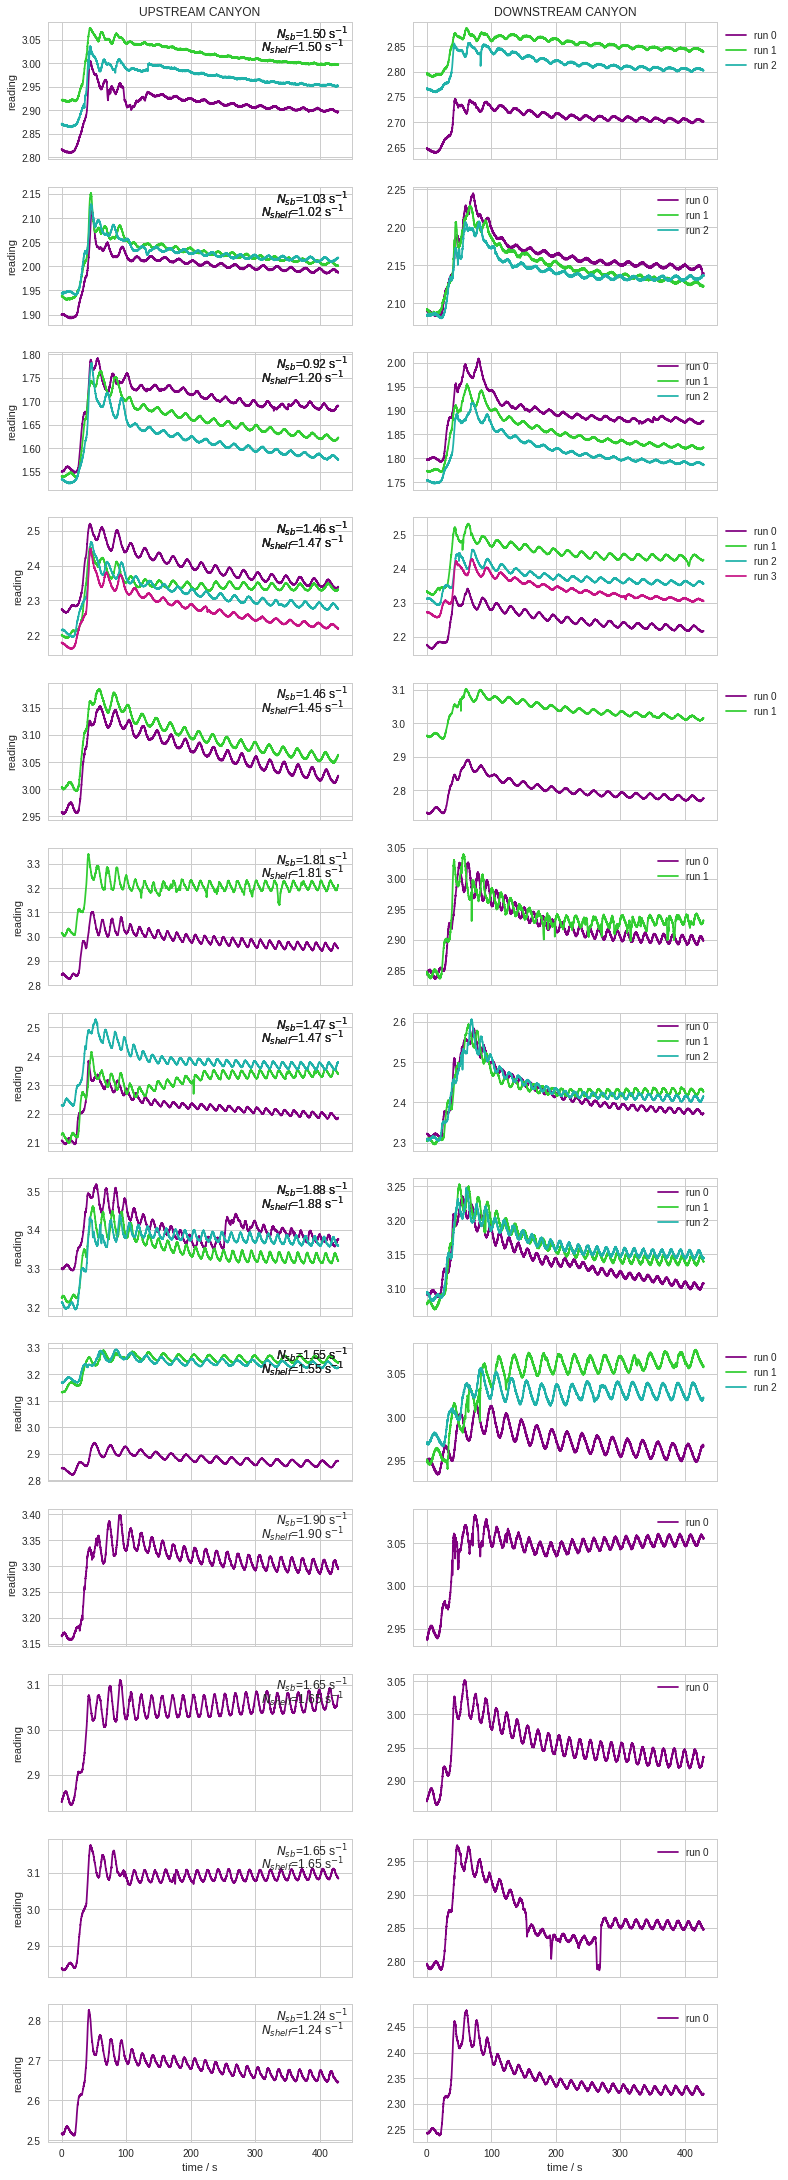

In [8]:
fig, ax = plt.subplots(exp_num, 2, figsize=(12,exp_num*3), sharex=True)

ax[0,0].set_title('UPSTREAM CANYON')
ax[0,1].set_title('DOWNSTREAM CANYON')

for exp, kk in zip(exp_dicts, range(exp_num)):
    
    for ii, col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        print(filepath)
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        time = mat['time']
        ax[kk,0].plot(time,P1,'-',color=col, label='run %d' %ii)
        ax[kk,1].plot(time,P2,'-',color=col, label='run %d' %ii)
        ax[kk,0].text(0.75,0.88,'$N_{sb}$=%1.2f s$^{-1}$' %exp["Nsb"], transform=ax[kk,0].transAxes)
        ax[kk,0].text(0.7,0.78,'$N_{shelf}$=%1.2f s$^{-1}$' %exp["Nshelf"], transform=ax[kk,0].transAxes)
       
    ax[kk,0].set_ylabel('reading')
    ax[kk,1].legend(bbox_to_anchor=(1,1))

ax[kk,0].set_xlabel('time / s')
ax[kk,1].set_xlabel('time / s')


### Density change from initial value

Plotting mean upstream, mean downstream and mean difference filtered using salish sea filter_timeseries with window win = int(T/dt) where T is the inertial period and dt the time between conduino samples.  

Using calibration August 09 and August 17:

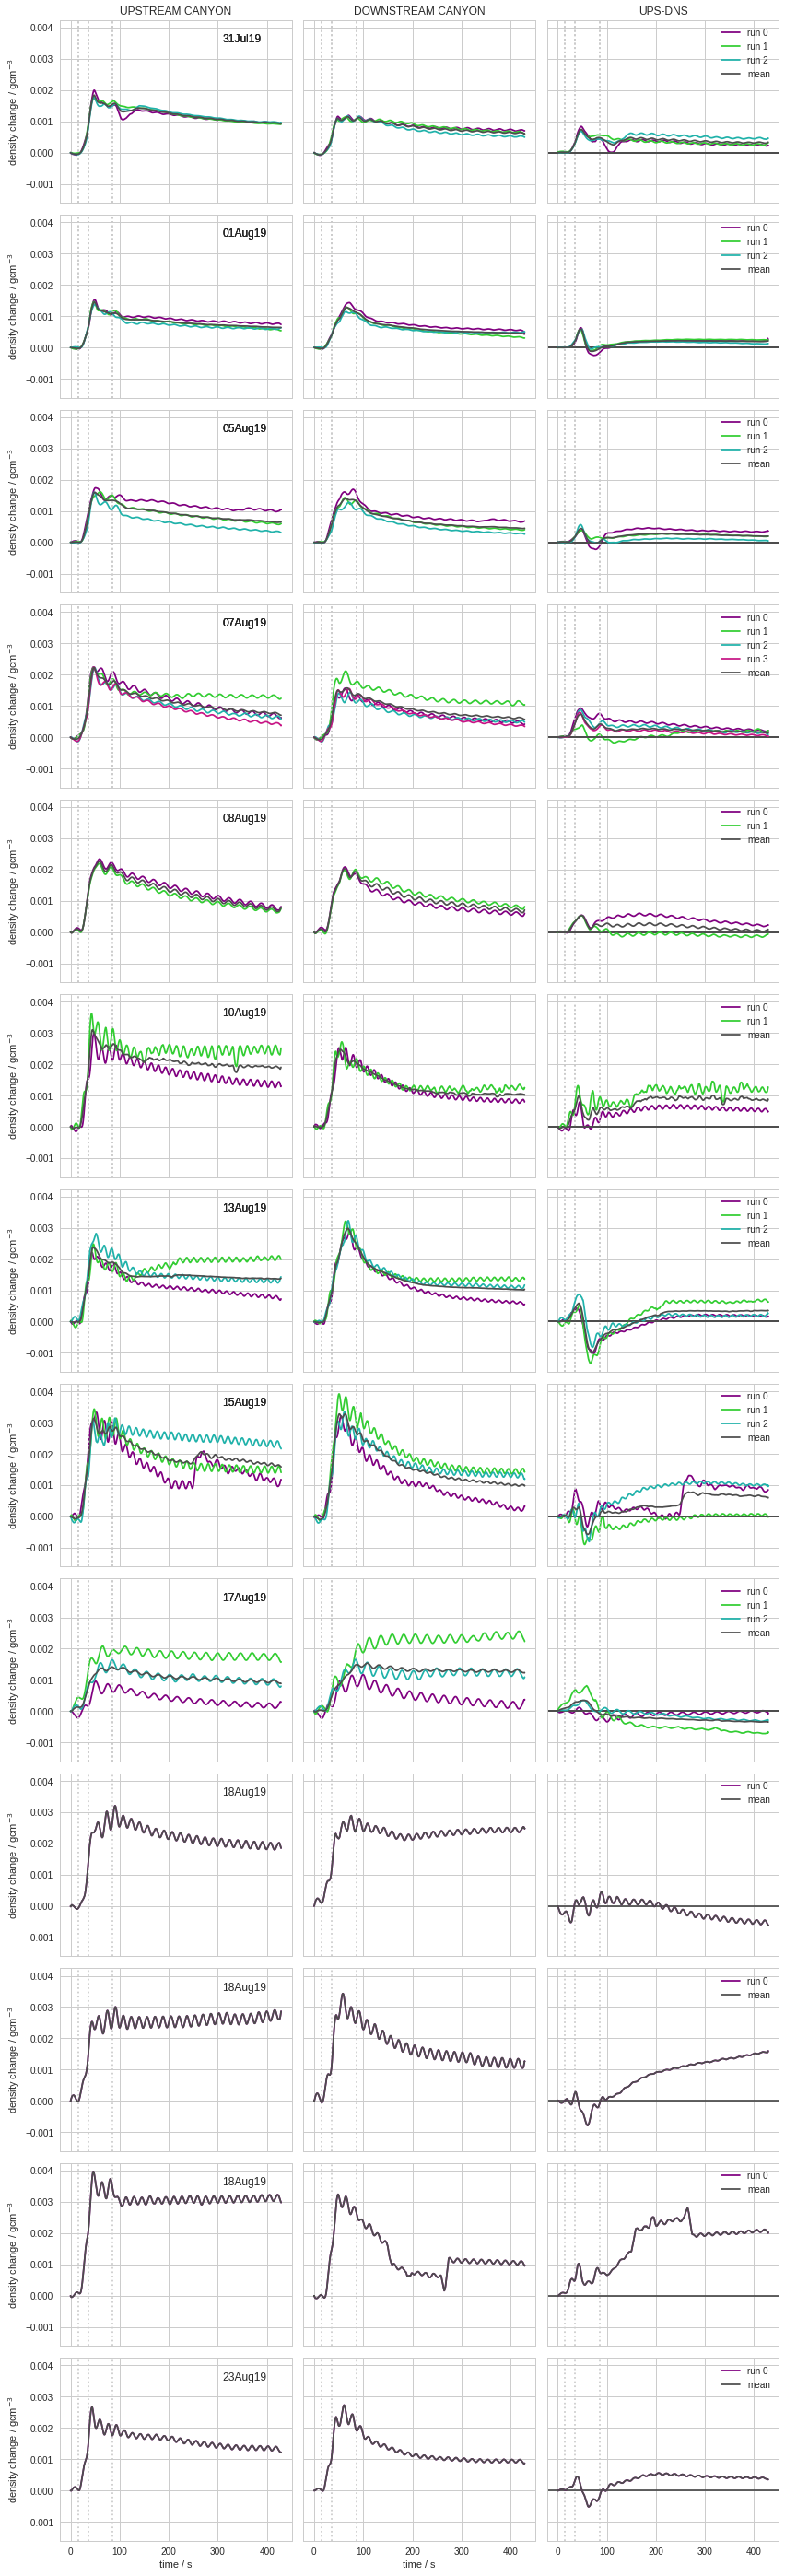

In [10]:
fig, ax = plt.subplots(exp_num, 3, figsize=(12,exp_num*3), sharey=True, sharex=True)
ax[0,0].set_title('UPSTREAM CANYON')
ax[0,1].set_title('DOWNSTREAM CANYON')
ax[0,2].set_title('UPS-DNS')

for exp, kk in zip(exp_dicts, range(exp_num)):
    avg1 = np.zeros_like(time)
    avg2 = np.zeros_like(time)
    avg3 = np.zeros_like(time)
    for ii,col in zip(range(len(exp['run_files'])),colors):
         
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        time = mat['time']
        dt = mat['dt']
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        if exp['calibration']=='09Aug19':
            dens1 = ctools.filter_timeseries(ctools.densANK1_09Aug19(P1),winlen=win)
            dens2 = ctools.filter_timeseries(ctools.densANK2_09Aug19(P2),winlen=win)
        else:
            dens1 = ctools.filter_timeseries(ctools.densANK1_17Aug19(P1),winlen=win)
            dens2 = ctools.filter_timeseries(ctools.densANK2_17Aug19(P2),winlen=win)
        plot_uprofile(ax[kk,0])
        plot_uprofile(ax[kk,1])
        plot_uprofile(ax[kk,2])
        ax[kk,0].plot(time, dens1-dens1[0],'-',color=col, label='run %d' %ii)
        ax[kk,1].plot(time, dens2-dens2[0],'-',color=col, label='run %d' %ii)
        ax[kk,2].axhline(0, color='0.3')
        ax[kk,2].plot(time, (dens1-dens1[0])-(dens2-dens2[0]),'-',color=col, label='run %d' %ii)
        ax[kk,0].text(0.70,0.88,'%s' %exp["date"], transform=ax[kk,0].transAxes)
        ax[kk,0].grid(True)
        ax[kk,1].grid(True)
        ax[kk,2].grid(True)
        avg1 = avg1+(dens1-dens1[0])
        avg2 = avg2+(dens2-dens2[0])
        avg3 = avg3+((dens1-dens1[0])-(dens2-dens2[0]))
    ax[kk,0].plot(time, avg1/(len(exp['run_files'])),'-',color='0.3', label='mean')
    ax[kk,1].plot(time, avg2/(len(exp['run_files'])),'-',color='0.3', label='mean')
    ax[kk,2].plot(time, avg3/(len(exp['run_files'])),'-',color='0.3', label='mean')    
    ax[kk,0].set_ylabel('density change / gcm$^{-3}$')
    ax[kk,2].legend(bbox_to_anchor=(1,1))
    
ax[kk,0].set_xlabel('time / s')
ax[kk,1].set_xlabel('time / s')
plt.tight_layout()

### Comparison average runs

Text(0.5,0,'time / s')

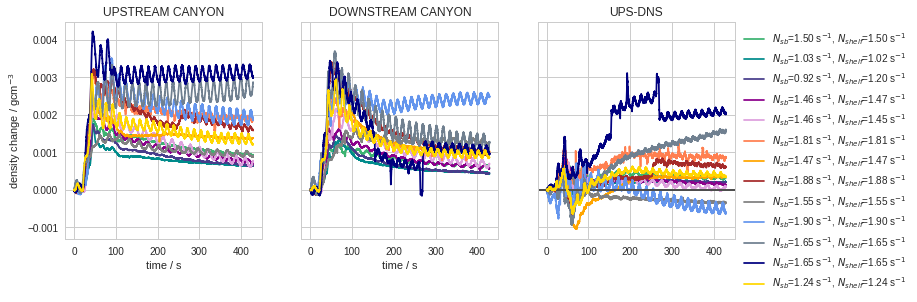

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(12,4), sharey=True, sharex=True)

ax[0].set_title('UPSTREAM CANYON')
ax[1].set_title('DOWNSTREAM CANYON')
ax[2].set_title('UPS-DNS')

for exp, kk in zip(exp_dicts, range(exp_num)):
    avg1 = np.zeros_like(time)
    avg2 = np.zeros_like(time)
    avg3 = np.zeros_like(time)
    
    for ii,col in zip(range(len(exp['run_files'])),colors):
         
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        ax[2].axhline(0, color='0.3')
        label = '$N_{sb}$=%1.2f s$^{-1}$, $N_{shelf}$=%1.2f s$^{-1}$' %(exp["Nsb"],exp["Nshelf"])
        avg1 = avg1+(dens1-dens1[0])
        avg2 = avg2+(dens2-dens2[0])
        avg3 = avg3+((dens1-dens1[0])-(dens2-dens2[0]))
    
    ax[0].plot(time, avg1/(len(exp['run_files'])),'-',color=exp['color'], label=label)
    ax[1].plot(time, avg2/(len(exp['run_files'])),'-',color=exp["color"], label=label)
    ax[2].plot(time, avg3/(len(exp['run_files'])),'-',color=exp["color"], label=label)    
    ax[0].set_ylabel('density change / gcm$^{-3}$')
    ax[2].legend(bbox_to_anchor=(1,1))

ax[0].set_xlabel('time / s')
ax[1].set_xlabel('time / s')


#### Averaged time series

12.566370614359172
12.566370614359172
12.566370614359172
12.566370614359172
12.566370614359172
7.853981633974483
7.853981633974483
7.853981633974483
12.566370614359172
8.975979010256552
8.975979010256552
8.975979010256552


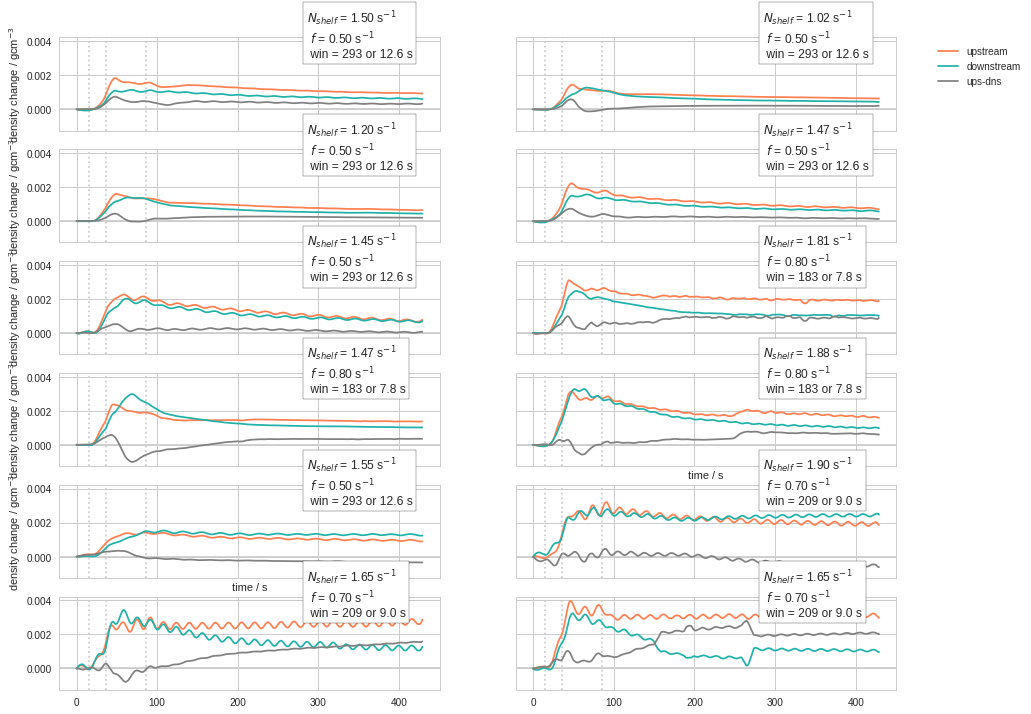

In [17]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5),(ax6,ax7),(ax8,ax9),(ax10,ax11)) = plt.subplots(6, 2, figsize=(15,12), sharey=True, sharex=True)

axs = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11]

for exp, kk, ax in zip(exp_Norder, range(exp_num), axs):
    avg1 = np.zeros_like(time)
    avg2 = np.zeros_like(time)
    avg3 = np.zeros_like(time)
    
    for ii,col in zip(range(len(exp['run_files'])),colors):
         
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        avg1 = avg1+(dens1-dens1[0])
        avg2 = avg2+(dens2-dens2[0])
        avg3 = avg3+((dens1-dens1[0])-(dens2-dens2[0]))
     
    inertial_period = 1/((exp["fo"])/(2*np.pi))
    win = int(inertial_period/dt)
    print(inertial_period)
    ax.axhline(0, color='0.8')
    plot_uprofile(ax)
    ax.text(0.65,0.8,'$N_{shelf}$ = %1.2f s$^{-1}$ \n $f$ = %1.2f s$^{-1}$ \n win = %d or %1.1f s' \
            %(exp["Nshelf"],exp["fo"],win, win*dt), transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=1) )
    
    ax.plot(time, ctools.filter_timeseries(avg1/(len(exp['run_files'])),winlen=win),'-',
            color='coral', label='upstream')
    ax.plot(time, ctools.filter_timeseries(avg2/(len(exp['run_files'])),winlen=win),'-',
            color='lightseagreen', label='downstream')
    ax.plot(time, ctools.filter_timeseries(avg3/(len(exp['run_files'])),winlen=win),
            '-',color='0.5', label='ups-dns')    
    

for ax in [ax0,ax2,ax4,ax6,ax8]:
    ax.set_ylabel('density change / gcm$^{-3}$')
ax7.set_xlabel('time / s')
ax8.set_xlabel('time / s')
ax1.legend(bbox_to_anchor=(1.35,1))

#### Independent runs (instead of using as repeats)

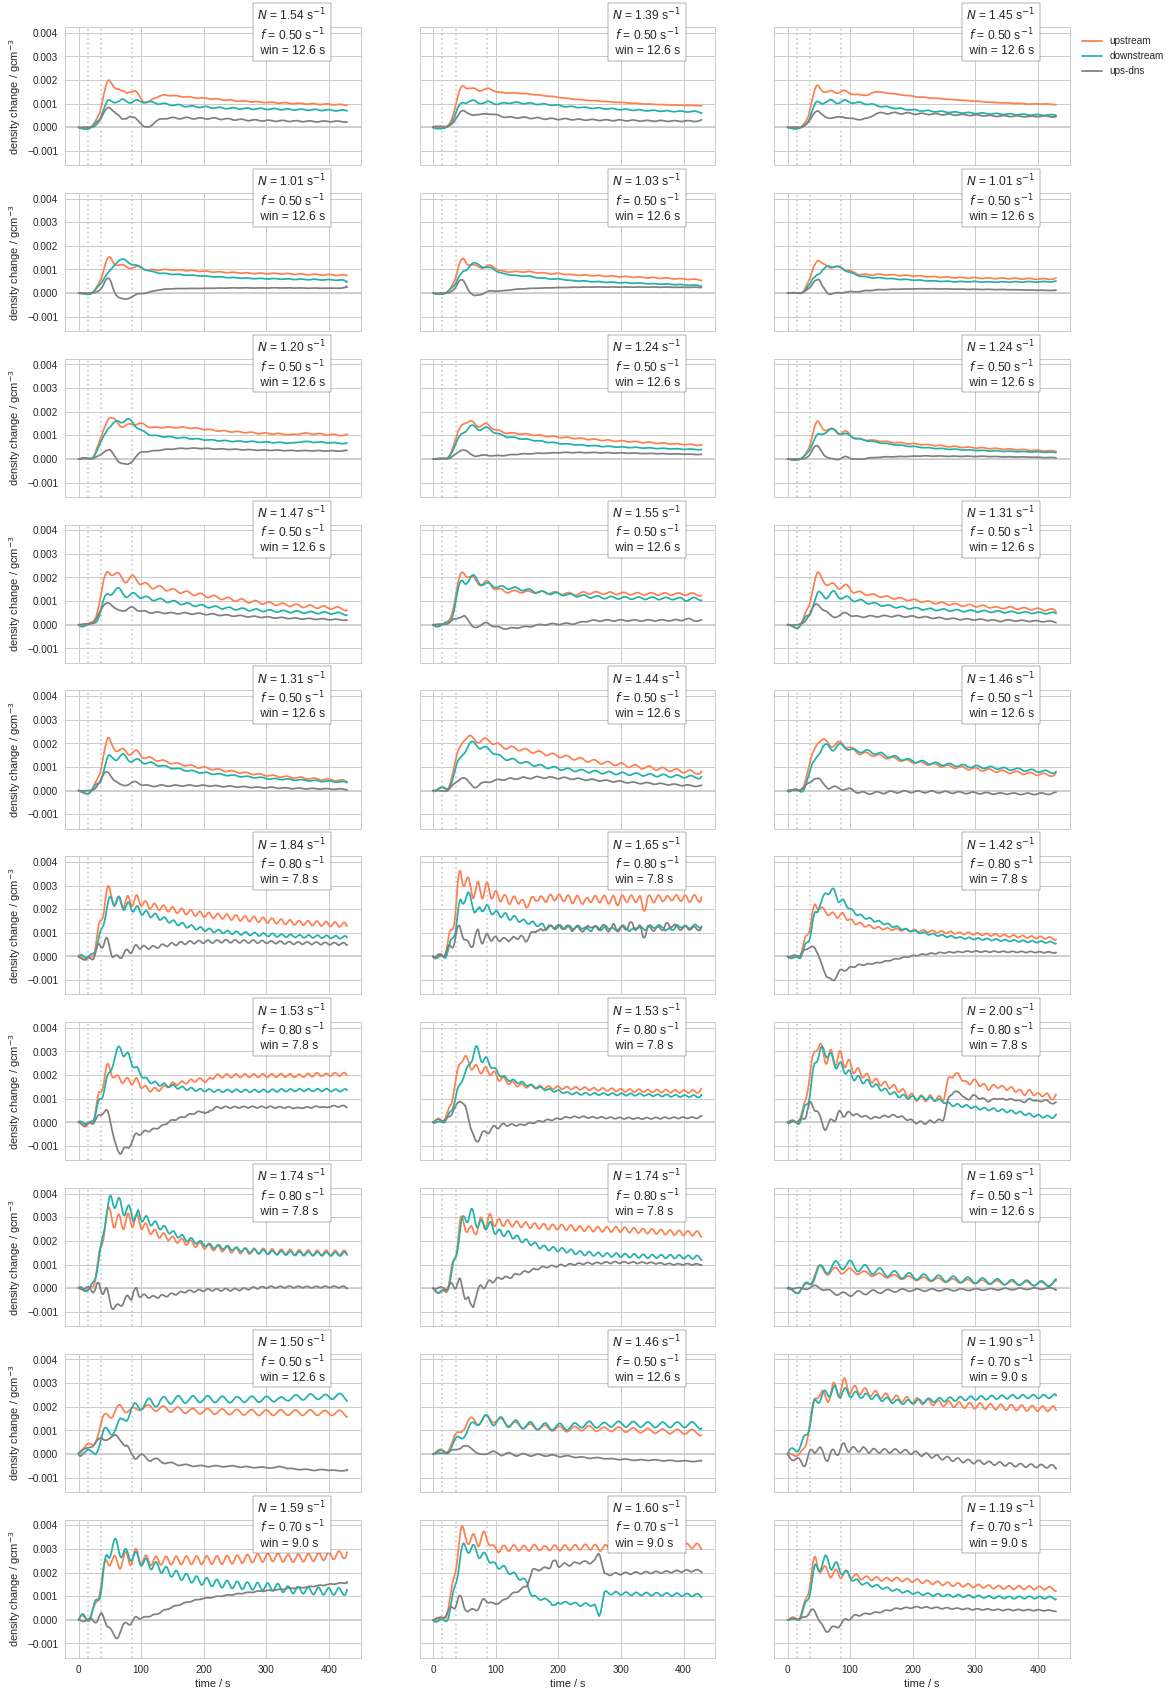

In [18]:
fig, axs = plt.subplots(10, 3, figsize=(18,30), sharey=True, sharex=True)
ax_all=[]
for nn in range(10):
    for mm in range(3):
        ax_all.append(axs[nn,mm])
ll = 0
rho0=998.5
g = 9.81
for exp, kk in zip(exp_Norder, range(exp_num)):
    for ii,col in zip(range(len(exp['run_files'])),colors):
        ax = ax_all[ll] 
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        avg1 = (dens1-dens1[0])
        avg2 = (dens2-dens2[0])
        avg3 = ((dens1-dens1[0])-(dens2-dens2[0]))
     
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        ax.axhline(0, color='0.8')
        plot_uprofile(ax)
        
        if np.isnan(exp["rho_sb"][ii])==True:
            N =((g/rho0)*((1000*exp["rho_sb"][ii-1]-1000*exp["rho_top"][ii-1])/(exp["hsb"]*0.01)))**0.5
        else:
            N =((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
        ax.text(0.65,0.8,'$N$ = %1.2f s$^{-1}$ \n $f$ = %1.2f s$^{-1}$ \n win = %1.1f s' \
                %(N,exp["fo"],win*dt), transform=ax.transAxes,
                bbox=dict(facecolor='white', alpha=1) )

        ax.plot(time, ctools.filter_timeseries(avg1,winlen=win),'-',
                color='coral', label='upstream')
        ax.plot(time, ctools.filter_timeseries(avg2,winlen=win),'-',
                color='lightseagreen', label='downstream')
        ax.plot(time, ctools.filter_timeseries(avg3,winlen=win),
                '-',color='0.5', label='ups-dns')    
        ll = ll+1

for ax in [axs[0,0],axs[1,0],axs[2,0],axs[3,0],axs[4,0],
          axs[5,0],axs[6,0],axs[7,0],axs[8,0],axs[9,0],]:
    ax.set_ylabel('density change / gcm$^{-3}$')
axs[9,0].set_xlabel('time / s')
axs[9,1].set_xlabel('time / s')
axs[9,2].set_xlabel('time / s')
axs[0,2].legend(bbox_to_anchor=(1.35,1))

### Difference between max and min of $\Delta\rho$ between canyons

Using all runs independently:

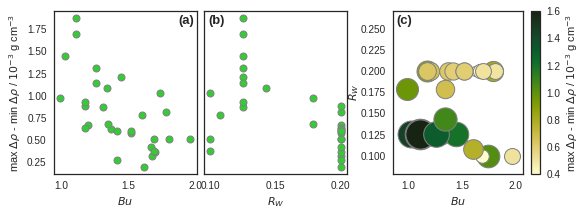

In [31]:
sns.set_style('white')
fig = plt.figure(figsize=(9,3))
gg = gspec.GridSpec(1, 2, wspace=0.2, width_ratios=[1.8,1])
gg1 = gspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gg[0], 
                                    wspace=0.05, width_ratios=[1,1])

ax1 = plt.subplot(gg1[0])
ax2 = plt.subplot(gg1[1])
ax2.set_yticks([], [])
ax3 = plt.subplot(gg[1])
rho0=998.5
g = 9.81

for exp, kk in zip(exp_Norder, range(exp_num)):
    for ii,col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        TS1 = dens1-dens1[0]
        TS2 = dens2-dens2[0]
        TS3 = (dens1-dens1[0])-(dens2-dens2[0])
        
        if np.isnan(exp["rho_sb"][ii])==True:
            N =((g/rho0)*((1000*exp["rho_sb"][ii-1]-1000*exp["rho_top"][ii-1])/(exp["hsb"]*0.01)))**0.5
        else:
            N =((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
        
        W = 5 # cm
        Bu = N*exp["hsb"]/(exp["fo"]*W)
        Rw = (exp["U"])/(exp["fo"]*W)
        
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        deltaRho = (np.max(ctools.filter_timeseries(TS3[0:2400],winlen=win))-
                    np.min(ctools.filter_timeseries(TS3[1000:2400],winlen=win)))
        sca = ax1.plot(Bu,deltaRho*1000,
                       'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
        sca2 = ax2.plot(Rw,deltaRho*1000,
                        'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
        sca3 = ax3.scatter(Bu,Rw,
                          s=500000*deltaRho,
                          c=deltaRho*1000,
                          cmap = cmo.cm.speed,
                          marker = 'o',
                          vmax=1.6,
                          vmin=0.4,
                          edgecolors='0.5',
                          linewidth=1, 
                          label=('N=%1.2fs$^{-1}$, f=%1.1frad/s, U=%1.2fcm/s' %(N,exp["fo"],exp["U"]))) 

cb = plt.colorbar(sca3)
cb.set_label(r'max $\Delta \rho$ - min $\Delta \rho$ / $10^{-3}$ g cm$^{-3}$')
ax1.set_xlabel('$Bu$')
ax2.set_xlabel('$R_W$')
ax3.set_ylabel('$R_W$', labelpad=0)
ax3.set_xlabel('$Bu$')
ax1.set_ylabel(r'max $\Delta \rho$ - min $\Delta \rho$ / $10^{-3}$ g cm$^{-3}$')
ax1.text(0.87,0.92,'(a)', fontweight='bold', fontsize=13, transform=ax1.transAxes)
ax2.text(0.03,0.92,'(b)', fontweight='bold', fontsize=13, transform=ax2.transAxes)
ax3.text(0.03,0.92,'(c)', fontweight='bold', fontsize=13, transform=ax3.transAxes)
plt.savefig('figures/Delta_rho_Twocan_Bu_Rw.eps', format='eps', transparent=False, bbox_inches='tight')

Using runs as replicates:

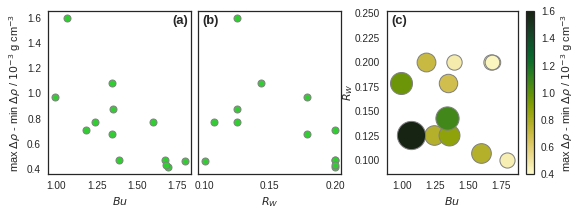

In [32]:
sns.set_style('white')
fig = plt.figure(figsize=(9,3))
gg = gspec.GridSpec(1, 2, wspace=0.2, width_ratios=[1.8,1])
gg1 = gspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gg[0], 
                                    wspace=0.05, width_ratios=[1,1])

ax1 = plt.subplot(gg1[0])
ax2 = plt.subplot(gg1[1])
ax2.set_yticks([], [])
ax3 = plt.subplot(gg[1])
rho0=998.5
g = 9.81

for exp, kk in zip(exp_Norder, range(exp_num)):
    avg1 = np.zeros_like(time)
    avg2 = np.zeros_like(time)
    avg3 = np.zeros_like(time)
    Navg = np.ones((4))*np.nan
    for ii,col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2) 
        avg1 = avg1+(dens1-dens1[0])
        avg2 = avg2+(dens2-dens2[0])
        avg3 = avg3+((dens1-dens1[0])-(dens2-dens2[0]))
        Navg[ii] = ((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5 
    N = np.nanmean(Navg)
    W = 5 # cm
    Bu = N*exp["hsb"]/(exp["fo"]*W)
    Rw = (exp["U"])/(exp["fo"]*W)

    inertial_period = 1/((exp["fo"])/(2*np.pi))
    win = int(inertial_period/dt)
    deltaRho = (np.max(ctools.filter_timeseries(avg3[0:2400]/(len(exp['run_files'])),winlen=win))-
                np.min(ctools.filter_timeseries(avg3[1000:2400]/(len(exp['run_files'])),winlen=win)))
    sca = ax1.plot(Bu,deltaRho*1000,
                   'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
    sca2 = ax2.plot(Rw,deltaRho*1000,
                    'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
    sca3 = ax3.scatter(Bu,Rw,
                      s=500000*deltaRho,
                      c=deltaRho*1000,
                      cmap = cmo.cm.speed,
                      marker = 'o',
                      vmax=1.6,
                      vmin=0.4,
                      edgecolors='0.5',
                      linewidth=1, 
                      label=('N=%1.2fs$^{-1}$, f=%1.1frad/s, U=%1.2fcm/s' %(N,exp["fo"],exp["U"]))) 

cb = plt.colorbar(sca3)
cb.set_label(r'max $\Delta \rho$ - min $\Delta \rho$ / $10^{-3}$ g cm$^{-3}$')
ax1.set_xlabel('$Bu$')
ax2.set_xlabel('$R_W$')
ax3.set_ylabel('$R_W$', labelpad=0)
ax3.set_xlabel('$Bu$')
ax1.set_ylabel(r'max $\Delta \rho$ - min $\Delta \rho$ / $10^{-3}$ g cm$^{-3}$')
ax1.text(0.87,0.92,'(a)', fontweight='bold', fontsize=13, transform=ax1.transAxes)
ax2.text(0.03,0.92,'(b)', fontweight='bold', fontsize=13, transform=ax2.transAxes)
ax3.text(0.03,0.92,'(c)', fontweight='bold', fontsize=13, transform=ax3.transAxes)
plt.savefig('figures/Delta_rho_Twocan_Bu_Rw_averages.eps', format='eps', transparent=False, bbox_inches='tight')

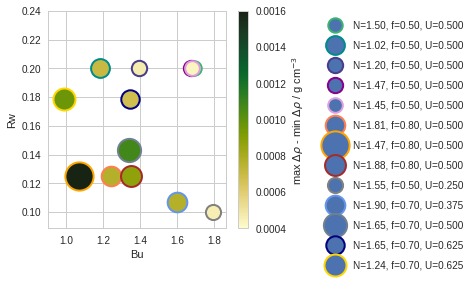

In [15]:
fig, (ax1) = plt.subplots(1, 1, figsize=(4,4), sharey=True)

for exp, kk in zip(exp_Norder, range(exp_num)):
    avg1 = np.zeros_like(time)
    avg2 = np.zeros_like(time)
    avg3 = np.zeros_like(time)
    Navg = np.zeros(len(exp['run_files']))
    for ii,col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        avg1 = avg1+(dens1-dens1[0])
        avg2 = avg2+(dens2-dens2[0])
        avg3 = avg3+((dens1-dens1[0])-(dens2-dens2[0]))
        
        Navg[ii] = ((9.81/998.5)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
    W = 5 # cm
    N = np.nanmean(Navg)
    Bu = N*exp["hsb"]/(exp["fo"]*W)
    Rw = exp["U"]/(exp["fo"]*W)
    
    inertial_period = 1/((exp["fo"])/(2*np.pi))
    win = int(inertial_period/dt)
    sca = ax1.scatter(Bu,Rw,
                      s=500000*(np.max(ctools.filter_timeseries(avg3[0:2400]/(len(exp['run_files'])),winlen=win))-
                                np.min(ctools.filter_timeseries(avg3[1000:2400]/(len(exp['run_files'])),winlen=win))),
                      c=(np.max(ctools.filter_timeseries(avg3[0:2400]/(len(exp['run_files'])),winlen=win))-
                         np.min(ctools.filter_timeseries(avg3[1000:2400]/(len(exp['run_files'])),winlen=win))),
                      cmap=cmo.cm.speed,
                      vmax=0.0016,
                      vmin=0.0004,
                      marker='o',edgecolors=exp["color"],linewidth=2, 
                      label=('N=%1.2f, f=%1.2f, U=%1.3f' %(exp["Nshelf"],exp["fo"],exp["U"]))) 
  
cb = plt.colorbar(sca)
cb.set_label(r'max $\Delta \rho$ - min $\Delta \rho$ / g cm$^{-3}$')
ax1.set_xlabel('Bu')
ax1.set_ylabel('Rw')
ax1.legend(bbox_to_anchor=(1.5,1),labelspacing=1)           

31Jul19
31Jul19
31Jul19
01Aug19
01Aug19
01Aug19
05Aug19
05Aug19
05Aug19
07Aug19
07Aug19
07Aug19
07Aug19
08Aug19
08Aug19
10Aug19
10Aug19
13Aug19
13Aug19
13Aug19
15Aug19
15Aug19
15Aug19
17Aug19
17Aug19
17Aug19
18Aug19
18Aug19
18Aug19
23Aug19


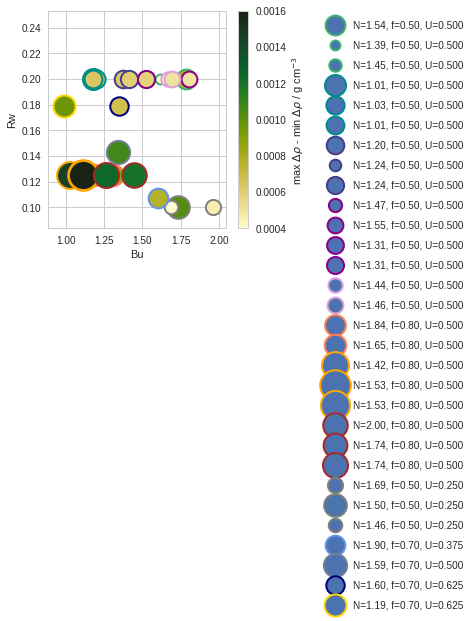

In [16]:
fig, (ax1) = plt.subplots(1, 1, figsize=(4,4), sharey=True)

for exp, kk in zip(exp_Norder, range(exp_num)):
    
    for ii,col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        delta = (dens1-dens1[0])-(dens2-dens2[0])
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        print(exp['date'])
        if np.isnan(exp["rho_sb"][ii]) == True:
            N = ((9.81/998.5)*((1000*exp["rho_sb"][ii-1]-1000*exp["rho_top"][ii-1])/(exp["hsb"]*0.01)))**0.5
        else:
            N = ((9.81/998.5)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
        W = 5 # cm
        Bu = N*exp["hsb"]/(exp["fo"]*W)
        Rw = exp["U"]/(exp["fo"]*W)
        tseries = ctools.filter_timeseries(delta,winlen=win)
        sca = ax1.scatter(Bu,Rw,
                          s=500000*(np.max(tseries[0:2400])-np.min(tseries[1000:2400])),
                          c=(np.max(tseries[0:2400])-np.min(tseries[1000:2400])),
                          cmap=cmo.cm.speed,
                          vmax=0.0016,
                          vmin=0.0004,
                          marker='o',edgecolors=exp["color"],linewidth=2, 
                          label=('N=%1.2f, f=%1.2f, U=%1.3f' %(N,exp["fo"],exp["U"]))) 
cb = plt.colorbar(sca)
cb.set_label(r'max $\Delta \rho$ - min $\Delta \rho$ / g cm$^{-3}$')
ax1.set_xlabel('Bu')
ax1.set_ylabel('Rw')
ax1.legend(bbox_to_anchor=(1.5,1),labelspacing=1)           

### Difference in maximum change in density at both canyons 
 This coud be extended as a difference in upwelling depths - see notebook two_canyons-Z.ipynb

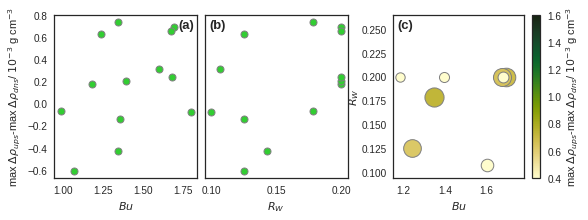

In [36]:
sns.set_style('white')
fig = plt.figure(figsize=(9,3))
gg = gspec.GridSpec(1, 2, wspace=0.2, width_ratios=[1.8,1])
gg1 = gspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gg[0], 
                                    wspace=0.05, width_ratios=[1,1])

ax1 = plt.subplot(gg1[0])
ax2 = plt.subplot(gg1[1])
ax2.set_yticks([], [])
ax3 = plt.subplot(gg[1])
rho0=998.5
g = 9.81

for exp, kk in zip(exp_Norder, range(exp_num)):
    avg1 = np.zeros_like(time)
    avg2 = np.zeros_like(time)
    avg3 = np.zeros_like(time)
    Navg = np.zeros(len(exp['run_files']))*np.nan
    for ii,col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        avg1 = avg1+(dens1-dens1[0])
        avg2 = avg2+(dens2-dens2[0])
        avg3 = avg3+((dens1-dens1[0])-(dens2-dens2[0]))
        Navg[ii] = ((9.81/998.5)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
    
    W = 5 # cm
    N = np.nanmean(Navg)
    Bu = N*exp["hsb"]/(exp["fo"]*W)
    Rw = exp["U"]/(exp["fo"]*W)
        
    inertial_period = 1/((exp["fo"])/(2*np.pi))
    win = int(inertial_period/dt)
    
    max_drho1 = np.max(ctools.filter_timeseries(avg1[0:2400]/(len(exp['run_files'])),winlen=win))
    max_drho2 = np.max(ctools.filter_timeseries(avg2[0:2400]/(len(exp['run_files'])),winlen=win))
    
    sca = ax1.plot(Bu,(max_drho1-max_drho2)*1000,
                   'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
    sca2 = ax2.plot(Rw,(max_drho1-max_drho2)*1000,
                    'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
    sca3 = ax3.scatter(Bu,Rw,
                      s=500000*(max_drho1-max_drho2),
                      c=(max_drho1-max_drho2)*1000,
                      cmap = cmo.cm.speed,
                      marker = 'o',
                      vmax=1.6,
                      vmin=0.4,
                      edgecolors='0.5',
                      linewidth=1, 
                      label=('N=%1.2fs$^{-1}$, f=%1.1frad/s, U=%1.2fcm/s' %(N,exp["fo"],exp["U"]))) 

cb = plt.colorbar(sca3)
cb.set_label(r'max $\Delta \rho_{ups}$-max $\Delta \rho_{dns}$/ $10^{-3}$ g cm$^{-3}$')
ax1.set_xlabel('$Bu$')
ax2.set_xlabel('$R_W$')
ax3.set_ylabel('$R_W$', labelpad=0)
ax3.set_xlabel('$Bu$')
ax1.set_ylabel(r'max $\Delta \rho_{ups}$-max $\Delta \rho_{dns}$/ $10^{-3}$ g cm$^{-3}$')
ax1.text(0.87,0.92,'(a)', fontweight='bold', fontsize=13, transform=ax1.transAxes)
ax2.text(0.03,0.92,'(b)', fontweight='bold', fontsize=13, transform=ax2.transAxes)
ax3.text(0.03,0.92,'(c)', fontweight='bold', fontsize=13, transform=ax3.transAxes)
plt.savefig('figures/maxDeltarho_Twocan_Bu_Rw_averages.eps', format='eps', transparent=False, bbox_inches='tight')

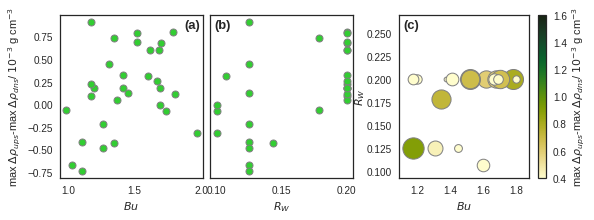

In [38]:
sns.set_style('white')
fig = plt.figure(figsize=(9,3))
gg = gspec.GridSpec(1, 2, wspace=0.2, width_ratios=[1.8,1])
gg1 = gspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gg[0], 
                                    wspace=0.05, width_ratios=[1,1])

ax1 = plt.subplot(gg1[0])
ax2 = plt.subplot(gg1[1])
ax2.set_yticks([], [])
ax3 = plt.subplot(gg[1])
rho0=998.5
g = 9.81

for exp, kk in zip(exp_Norder, range(exp_num)):
    
    for ii,col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        avg1 = (dens1-dens1[0])
        avg2 = (dens2-dens2[0])
        avg3 = ((dens1-dens1[0])-(dens2-dens2[0]))
        if np.isnan(exp["rho_sb"][ii]) == True:
            N = ((9.81/998.5)*((1000*exp["rho_sb"][ii-1]-1000*exp["rho_top"][ii-1])/(exp["hsb"]*0.01)))**0.5
        else:
            N = ((9.81/998.5)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
    
        W = 5 # cm
        Bu = N*exp["hsb"]/(exp["fo"]*W)
        Rw = exp["U"]/(exp["fo"]*W)

        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)

        max_drho1 = np.max(ctools.filter_timeseries(avg1[0:2400],winlen=win))
        max_drho2 = np.max(ctools.filter_timeseries(avg2[0:2400],winlen=win))

        sca = ax1.plot(Bu,(max_drho1-max_drho2)*1000,
                       'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
        sca2 = ax2.plot(Rw,(max_drho1-max_drho2)*1000,
                        'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
        sca3 = ax3.scatter(Bu,Rw,
                          s=500000*(max_drho1-max_drho2),
                          c=(max_drho1-max_drho2)*1000,
                          cmap = cmo.cm.speed,
                          marker = 'o',
                          vmax=1.6,
                          vmin=0.4,
                          edgecolors='0.5',
                          linewidth=1, 
                          label=('N=%1.2fs$^{-1}$, f=%1.1frad/s, U=%1.2fcm/s' %(N,exp["fo"],exp["U"]))) 

cb = plt.colorbar(sca3)
cb.set_label(r'max $\Delta \rho_{ups}$-max $\Delta \rho_{dns}$/ $10^{-3}$ g cm$^{-3}$')
ax1.set_xlabel('$Bu$')
ax2.set_xlabel('$R_W$')
ax3.set_ylabel('$R_W$', labelpad=0)
ax3.set_xlabel('$Bu$')
ax1.set_ylabel(r'max $\Delta \rho_{ups}$-max $\Delta \rho_{dns}$/ $10^{-3}$ g cm$^{-3}$')
ax1.text(0.87,0.92,'(a)', fontweight='bold', fontsize=13, transform=ax1.transAxes)
ax2.text(0.03,0.92,'(b)', fontweight='bold', fontsize=13, transform=ax2.transAxes)
ax3.text(0.03,0.92,'(c)', fontweight='bold', fontsize=13, transform=ax3.transAxes)
plt.savefig('figures/maxDeltarho_Twocan_Bu_Rw.eps', format='eps', transparent=False, bbox_inches='tight')

### Lag between upstream max and downstream max

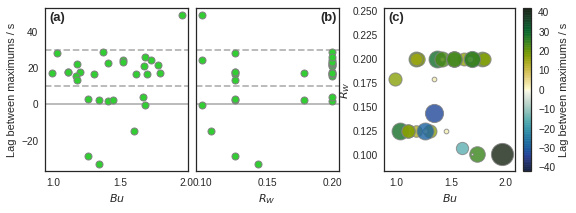

In [48]:
sns.set_style('white')
fig = plt.figure(figsize=(9,3))
gg = gspec.GridSpec(1, 2, wspace=0.2, width_ratios=[1.8,1])
gg1 = gspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gg[0], 
                                    wspace=0.05, width_ratios=[1,1])

ax1 = plt.subplot(gg1[0])
ax2 = plt.subplot(gg1[1])
ax2.set_yticks([], [])
ax3 = plt.subplot(gg[1])
rho0=998.5
g = 9.81

ax1.axhline(0,color='0.7')
ax2.axhline(0,color='0.7')
ax1.axhline(10,color='0.7', linestyle='--')
ax2.axhline(10,color='0.7', linestyle='--')
ax1.axhline(30,color='0.7', linestyle='--')
ax2.axhline(30,color='0.7', linestyle='--')

for exp, kk in zip(exp_Norder, range(exp_num)):
    
    for ii,col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        avg1 = (dens1-dens1[0])
        avg2 = (dens2-dens2[0])
        avg3 = ((dens1-dens1[0])-(dens2-dens2[0]))
        if np.isnan(exp["rho_sb"][ii]) == True:
            N = ((9.81/998.5)*((1000*exp["rho_sb"][ii-1]-1000*exp["rho_top"][ii-1])/(exp["hsb"]*0.01)))**0.5
        else:
            N = ((9.81/998.5)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
    
        W = 5 # cm
        Bu = N*exp["hsb"]/(exp["fo"]*W)
        Rw = exp["U"]/(exp["fo"]*W)

        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)

        max_ind1 = np.argmax(ctools.filter_timeseries(avg1[0:2400],winlen=win))
        max_ind2 = np.argmax(ctools.filter_timeseries(avg2[0:2400],winlen=win))
        time1 = time[max_ind1]
        time2 = time[max_ind2]
        
        sca = ax1.plot(Bu,time2-time1,
                       'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
        sca2 = ax2.plot(Rw,time2-time1,
                        'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
        sca3 = ax3.scatter(Bu,Rw,
                          s=(abs(time2-time1))*10,
                          c=time2-time1,
                          cmap = cmo.cm.delta,
                          marker = 'o',
                          vmax=42,
                          vmin=-42,
                          edgecolors='0.5',
                          linewidth=1, 
                          alpha=0.8,
                          label=('N=%1.2fs$^{-1}$, f=%1.1frad/s, U=%1.2fcm/s' %(N,exp["fo"],exp["U"]))) 

cb = plt.colorbar(sca3)
cb.set_label(r'Lag between maximums / s')
ax1.set_xlabel('$Bu$')
ax2.set_xlabel('$R_W$')
ax3.set_ylabel('$R_W$', labelpad=0)
ax3.set_xlabel('$Bu$')
ax1.set_ylabel(r'Lag between maximums / s')
ax1.text(0.03,0.92,'(a)', fontweight='bold', fontsize=13, transform=ax1.transAxes)
ax2.text(0.87,0.92,'(b)', fontweight='bold', fontsize=13, transform=ax2.transAxes)
ax3.text(0.03,0.92,'(c)', fontweight='bold', fontsize=13, transform=ax3.transAxes)
plt.savefig('figures/lag_max_Twocan_Bu_Rw.eps', format='eps', transparent=False, bbox_inches='tight')

###  Maximum density change anomaly (magnitude and time of occurrence)

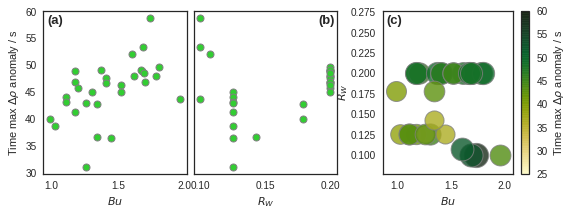

In [62]:
sns.set_style('white')
fig = plt.figure(figsize=(9,3))
gg = gspec.GridSpec(1, 2, wspace=0.2, width_ratios=[1.8,1])
gg1 = gspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gg[0], 
                                    wspace=0.05, width_ratios=[1,1])

ax1 = plt.subplot(gg1[0])
ax2 = plt.subplot(gg1[1])
ax2.set_yticks([], [])
ax3 = plt.subplot(gg[1])
rho0=998.5
g = 9.81

for exp, kk in zip(exp_Norder, range(exp_num)):
    
    for ii,col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        avg1 = (dens1-dens1[0])
        avg2 = (dens2-dens2[0])
        avg3 = ((dens1-dens1[0])-(dens2-dens2[0]))
        if np.isnan(exp["rho_sb"][ii]) == True:
            N = ((9.81/998.5)*((1000*exp["rho_sb"][ii-1]-1000*exp["rho_top"][ii-1])/(exp["hsb"]*0.01)))**0.5
        else:
            N = ((9.81/998.5)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
    
        W = 5 # cm
        Bu = N*exp["hsb"]/(exp["fo"]*W)
        Rw = exp["U"]/(exp["fo"]*W)

        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)

        max_ind = np.argmax(ctools.filter_timeseries(avg3[0:1800],winlen=win))
        time_max = time[max_ind]
        
        sca = ax1.plot(Bu,time_max,
                       'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
        sca2 = ax2.plot(Rw,time_max,
                        'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
        sca3 = ax3.scatter(Bu,Rw,
                          s=(abs(time_max))*10,
                          c=time_max,
                          cmap = cmo.cm.speed,
                          marker = 'o',
                          vmax=60,
                          vmin=25,
                          edgecolors='0.5',
                          linewidth=1, 
                          alpha=0.8,
                          label=('N=%1.2fs$^{-1}$, f=%1.1frad/s, U=%1.2fcm/s' %(N,exp["fo"],exp["U"]))) 

cb = plt.colorbar(sca3)
cb.set_label(r'Time max $\Delta\rho$ anomaly / s')
ax1.set_xlabel('$Bu$')
ax2.set_xlabel('$R_W$')
ax3.set_ylabel('$R_W$', labelpad=0)
ax3.set_xlabel('$Bu$')
ax1.set_ylabel(r'Time max $\Delta\rho$ anomaly / s')
ax1.text(0.03,0.92,'(a)', fontweight='bold', fontsize=13, transform=ax1.transAxes)
ax2.text(0.87,0.92,'(b)', fontweight='bold', fontsize=13, transform=ax2.transAxes)
ax3.text(0.03,0.92,'(c)', fontweight='bold', fontsize=13, transform=ax3.transAxes)
plt.savefig('figures/time_max_drho_anom_Twocan_Bu_Rw.eps', format='eps', transparent=False, bbox_inches='tight')

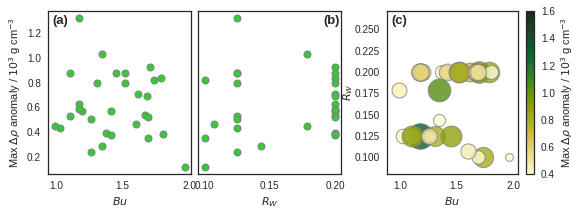

In [95]:
sns.set_style('white')
fig = plt.figure(figsize=(9,3))
gg = gspec.GridSpec(1, 2, wspace=0.2, width_ratios=[1.8,1])
gg1 = gspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gg[0], 
                                    wspace=0.05, width_ratios=[1,1])

ax1 = plt.subplot(gg1[0])
ax2 = plt.subplot(gg1[1])
ax2.set_yticks([], [])
ax3 = plt.subplot(gg[1])
rho0=998.5
g = 9.81

for exp, kk in zip(exp_Norder, range(exp_num)):
    
    for ii,col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        avg1 = (dens1-dens1[0])
        avg2 = (dens2-dens2[0])
        avg3 = ((dens1-dens1[0])-(dens2-dens2[0]))
        if np.isnan(exp["rho_sb"][ii]) == True:
            N = ((9.81/998.5)*((1000*exp["rho_sb"][ii-1]-1000*exp["rho_top"][ii-1])/(exp["hsb"]*0.01)))**0.5
        else:
            N = ((9.81/998.5)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
    
        W = 5 # cm
        Bu = N*exp["hsb"]/(exp["fo"]*W)
        Rw = exp["U"]/(exp["fo"]*W)

        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)

        max_rho = np.max(ctools.filter_timeseries(avg3[0:2400],winlen=win))
        
        sca = ax1.plot(Bu,max_rho*1000,
                       'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
        sca2 = ax2.plot(Rw,max_rho*1000,
                        'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
        sca3 = ax3.scatter(Bu,Rw,
                          s=(abs(max_rho))*500000,
                          c=max_rho*1000,
                          cmap = cmo.cm.speed,
                          marker = 'o',
                          vmax=1.6,
                          vmin=0.4,
                          edgecolors='0.5',
                          linewidth=1, 
                          alpha=0.8,
                          label=('N=%1.2fs$^{-1}$, f=%1.1frad/s, U=%1.2fcm/s' %(N,exp["fo"],exp["U"]))) 

cb = plt.colorbar(sca3)
cb.set_label(r'Max $\Delta\rho$ anomaly / $10^3$ g cm$^{-3}$')
ax1.set_xlabel('$Bu$')
ax2.set_xlabel('$R_W$')
ax3.set_ylabel('$R_W$', labelpad=0)
ax3.set_xlabel('$Bu$')
ax1.set_ylabel(r'Max $\Delta\rho$ anomaly / $10^3$ g cm$^{-3}$')
ax1.text(0.03,0.92,'(a)', fontweight='bold', fontsize=13, transform=ax1.transAxes)
ax2.text(0.87,0.92,'(b)', fontweight='bold', fontsize=13, transform=ax2.transAxes)
ax3.text(0.03,0.92,'(c)', fontweight='bold', fontsize=13, transform=ax3.transAxes)
plt.savefig('figures/max_drho_anom_Twocan_Bu_Rw.eps', format='eps', transparent=False, bbox_inches='tight')

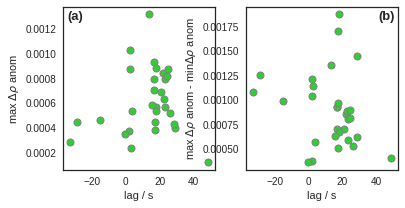

In [102]:
sns.set_style('white')
fig = plt.figure(figsize=(6,3))
gg = gspec.GridSpec(1, 2, wspace=0.2, width_ratios=[1,1])

ax1 = plt.subplot(gg[0])
ax2 = plt.subplot(gg[1])
rho0=998.5
g = 9.81

for exp, kk in zip(exp_Norder, range(exp_num)):
    
    for ii,col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        avg1 = ctools.filter_timeseries(dens1-dens1[0],winlen=win)
        avg2 = ctools.filter_timeseries(dens2-dens2[0],winlen=win)
        avg3 = avg1-avg2
        if np.isnan(exp["rho_sb"][ii]) == True:
            N = ((9.81/998.5)*((1000*exp["rho_sb"][ii-1]-1000*exp["rho_top"][ii-1])/(exp["hsb"]*0.01)))**0.5
        else:
            N = ((9.81/998.5)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
    
        W = 5 # cm
        Bu = N*exp["hsb"]/(exp["fo"]*W)
        Rw = exp["U"]/(exp["fo"]*W)

       
        max_ind1 = np.argmax(avg1[0:2400])
        max_ind2 = np.argmax(avg2[0:2400])
        maxmin_dif = np.max(avg3[0:2400])-np.min(avg3[0:1800])
        max_dif = np.max(avg3[0:2400])
        lag = time[max_ind2]-time[max_ind1]
        
        sca = ax1.plot(lag,max_dif,
                       'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
        sca2 = ax2.plot(lag,maxmin_dif,
                        'o',color='limegreen', markeredgecolor='0.5', markeredgewidth=1) 
    
ax1.set_ylabel(r'max $\Delta\rho$ anom')
ax2.set_ylabel(r'max $\Delta \rho$ anom - min$\Delta \rho$ anom')
ax1.set_xlabel('lag / s')
ax2.set_xlabel('lag / s')

ax1.text(0.03,0.92,'(a)', fontweight='bold', fontsize=13, transform=ax1.transAxes)
ax2.text(0.87,0.92,'(b)', fontweight='bold', fontsize=13, transform=ax2.transAxes)
plt.savefig('figures/lag_vs_max_drho_anom_Twocan.eps', format='eps', transparent=False, bbox_inches='tight')

### How can I determine if the canyons are independent of interacting?

A metric to determine canyon interaction could take into account two aspects of the canyons' response:
1. Lag between maximum density change - If canyons are independent they should respond at the same time and they should have the maximum change in density at the same time, ideally.
2. Magnitude of maximum change in density - If canyons are independent, their change in density should be the same (depth of upwelling) ideally.  